In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from sklearn.linear_model import LinearRegression

# **Funciones lineales IRIS**


## Diagrama de Dispersión


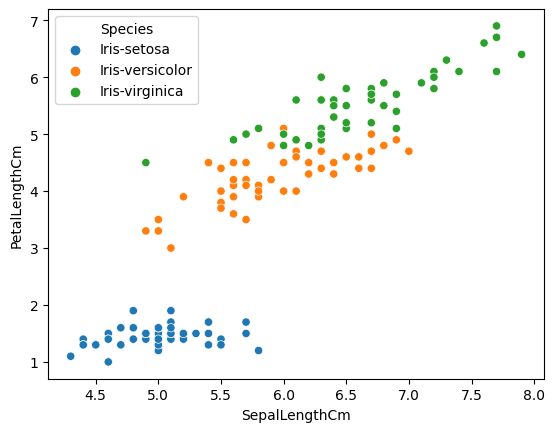

In [ ]:
iris = pd.read_excel("irisNvo.xlsx", sheet_name="Iris")

sns.scatterplot(data=iris, x="SepalLengthCm", y="PetalLengthCm", hue="Species")

plt.show()

## Diagrama pairplot(ver correlaciones entre todas las columnas)


In [ ]:
iris_sin_id = iris.drop("Id", axis=1)
sns.pairplot(iris_sin_id, hue="Species")

<ipython-input-91-fb70caa0f350>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(),annot=True)


<Axes: >

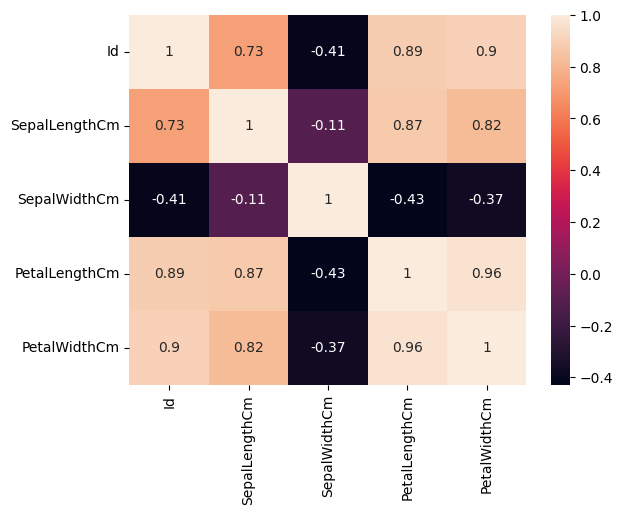

In [ ]:
sns.heatmap(iris.corr(), annot=True)

## Variación de datos


In [ ]:
std_virginica_sepal = round(
    iris[iris["Species"] == "Iris-virginica"]["SepalLengthCm"].std(), 4
)
std_virginica_petal = round(
    iris[iris["Species"] == "Iris-virginica"]["PetalLengthCm"].std(), 4
)
mean_virginica_sepal = round(
    iris[iris["Species"] == "Iris-virginica"]["SepalLengthCm"].mean(), 4
)
mean_virginica_petal = round(
    iris[iris["Species"] == "Iris-virginica"]["PetalLengthCm"].mean(), 4
)
median_virginica_sepal = round(
    iris[iris["Species"] == "Iris-virginica"]["SepalLengthCm"].median(), 4
)
median_virginica_petal = round(
    iris[iris["Species"] == "Iris-virginica"]["PetalLengthCm"].median(), 4
)
correlation_virginica = round(
    np.corrcoef(
        iris[iris["Species"] == "Iris-virginica"]["SepalLengthCm"],
        iris[iris["Species"] == "Iris-virginica"]["PetalLengthCm"],
    )[0, 1],
    4,
)


print("Desviación estándar para Iris-virginica - SepalLengthCm:", std_virginica_sepal)
print("Desviación estándar para Iris-virginica - PetalLengthCm:", std_virginica_petal)
print("El promedio para Iris-virginica - SepalLengthCm:", mean_virginica_sepal)
print("El promedio para Iris-virginica - PetalLengthCm:", mean_virginica_petal)
print("La mediana para Iris-virginica - SepalLengthCm:", median_virginica_sepal)
print("La mediana para Iris-virginica - PetalLengthCm:", median_virginica_petal)
print("El coeficiente de correlación para Iris-virginica", correlation_virginica)

Desviación estándar para Iris-virginica - SepalLengthCm: 0.6386
Desviación estándar para Iris-virginica - PetalLengthCm: 0.5591
El promedio para Iris-virginica - SepalLengthCm: 6.6104
El promedio para Iris-virginica - PetalLengthCm: 5.5646
La mediana para Iris-virginica - SepalLengthCm: 6.5
La mediana para Iris-virginica - PetalLengthCm: 5.6
El coeficiente de correlación para Iris-virginica 0.8629


## Grafica de barras por conteo de valores


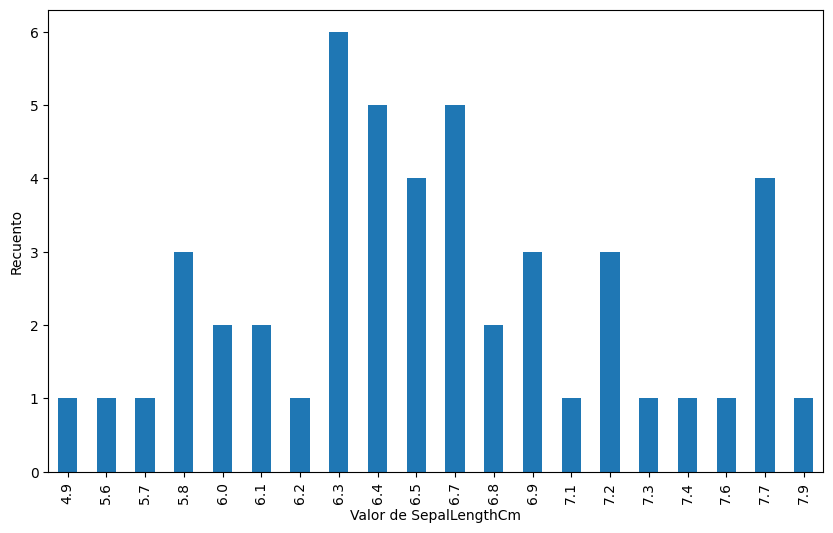

In [ ]:
plt.figure(figsize=(10, 6))


value_count = iris[iris["Species"] == "Iris-virginica"][
    "SepalLengthCm"
].value_counts()  ##Cuenta cuantas veces se repite cada dato
sorted_values = np.sort(
    iris[iris["Species"] == "Iris-virginica"]["SepalLengthCm"].unique()
)  ##Acomoda de menor a mayor los datos
value_counts_reindexed = value_count.reindex(
    sorted_values
)  ##Cambia el indice para que el eje X este de menor a mayor con el valor de las veces que se repite
value_counts_reindexed.plot(kind="bar")  # Crea la gráfica de barras
plt.xlabel("Valor de SepalLengthCm")  # Le pone titulo al eje x
plt.ylabel("Recuento")  # Le pone titulo al eje Y

plt.show()  # Muestra el gráfico

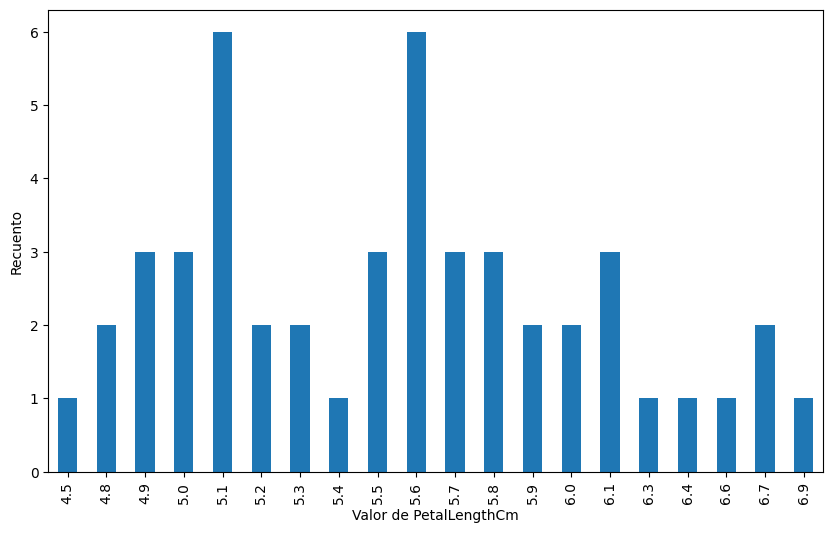

In [ ]:
plt.figure(figsize=(10, 6))


value_count = iris[iris["Species"] == "Iris-virginica"]["PetalLengthCm"].value_counts()
sorted_values = np.sort(
    iris[iris["Species"] == "Iris-virginica"]["PetalLengthCm"].unique()
)
value_counts_reindexed = value_count.reindex(sorted_values)
value_counts_reindexed.plot(kind="bar")
plt.xlabel("Valor de PetalLengthCm")
plt.ylabel("Recuento")

plt.show()

## Regresión lineal para valor especifico y grafica


In [ ]:
x = iris[iris["Species"] == "Iris-virginica"]["SepalLengthCm"].values.reshape(
    -1, 1
)  # Variable predictor: PetalLength
y = iris[iris["Species"] == "Iris-virginica"][
    "PetalLengthCm"
].values  # Variable objetivo: SepalLength

model = LinearRegression()  # Inicializar el modelo de regresión lineal

model.fit(x, y)  # Ajustar el modelo a los datos
Sepal_length = 5.8
petal_length_pred = model.predict([[Sepal_length]])  # Realizar una predicción
petal_length_pred_red = round(petal_length_pred[0], 4)

print(
    "Para un SepalLength de",
    Sepal_length,
    "cm, la predicción para PedalLength es:",
    petal_length_pred_red,
    "cm",
)

LinearRegression()
Para un SepalLength de 5.8 cm, la predicción para PedalLength es: 4.9524 cm


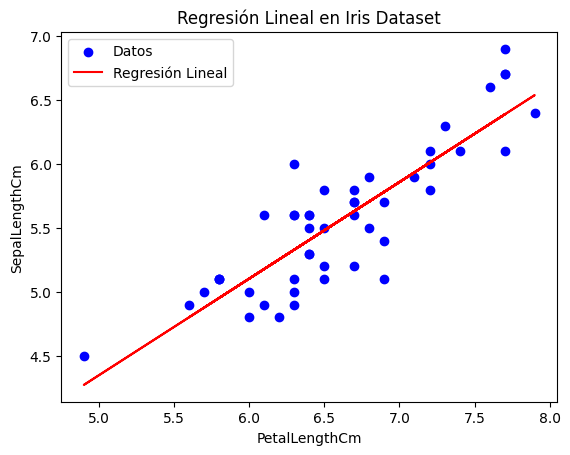

In [ ]:
plt.scatter(x, y, color="b", label="Datos")  # Crea la grafica de dispersion
plt.plot(x, model.predict(x), color="r", label="Regresión Lineal")
plt.xlabel("PetalLengthCm")
plt.ylabel("SepalLengthCm")
plt.title("Regresión Lineal en Iris Dataset")
plt.legend()
plt.show()

## Cuartiles


In [ ]:
q1_sepal = np.percentile(iris[iris["Species"] == "Iris-virginica"]["SepalLengthCm"], 25)
q3_sepal = np.percentile(iris[iris["Species"] == "Iris-virginica"]["SepalLengthCm"], 75)
max_sepal = iris[iris["Species"] == "Iris-virginica"]["SepalLengthCm"].max()
min_sepal = iris[iris["Species"] == "Iris-virginica"]["SepalLengthCm"].min()
rango_intercuartil_sepal = round(q3_sepal - q1_sepal, 4)
q1_petal = np.percentile(iris[iris["Species"] == "Iris-virginica"]["PetalLengthCm"], 25)
q3_petal = np.percentile(iris[iris["Species"] == "Iris-virginica"]["PetalLengthCm"], 75)
max_petal = iris[iris["Species"] == "Iris-virginica"]["PetalLengthCm"].max()
min_petal = iris[iris["Species"] == "Iris-virginica"]["PetalLengthCm"].min()
rango_intercuartil_petal = round(q3_petal - q1_petal, 4)


print("El primer cuartil para Iris-virginica-SepalLengthCm:", q1_sepal, "cm")
print("El tercer cuartil para Iris-virginica-SepalLengthCm:", q3_sepal, "cm")
print("El valor máximo para Iris-viginica-SepalLengthCm", max_sepal, "cm")
print("El valor minimo para Iris-viginica-SepalLengthCm", min_sepal, "cm")
print(
    "El rango intercuartil para Iris-virginica-SepalLengthCm:",
    rango_intercuartil_sepal,
    "cm",
)
print("La mediana para Iris-virginica-SepalLengthCm:", median_virginica_sepal, "cm")
print("La mediana para Iris-virginica-PetalLengthCm:", median_virginica_petal, "cm")
print("El valor máximo para Iris-viginica-PetalLengthCm", max_petal, "cm")
print("El valor minimo para Iris-viginica-PetalLengthCm", min_petal, "cm")
print(
    "El rango intercuartil para Iris-virginica-PetalLengthCm:",
    rango_intercuartil_petal,
    "cm",
)

El primer cuartil para Iris-virginica-SepalLengthCm: 6.3 cm
El tercer cuartil para Iris-virginica-SepalLengthCm: 6.95 cm
El valor máximo para Iris-viginica-SepalLengthCm 7.9 cm
El valor minimo para Iris-viginica-SepalLengthCm 4.9 cm
El rango intercuartil para Iris-virginica-SepalLengthCm: 0.65 cm
La mediana para Iris-virginica-SepalLengthCm: 6.5 cm
La mediana para Iris-virginica-PetalLengthCm: 5.6 cm
El valor máximo para Iris-viginica-PetalLengthCm 6.9 cm
El valor minimo para Iris-viginica-PetalLengthCm 4.5 cm
El rango intercuartil para Iris-virginica-PetalLengthCm: 0.8 cm


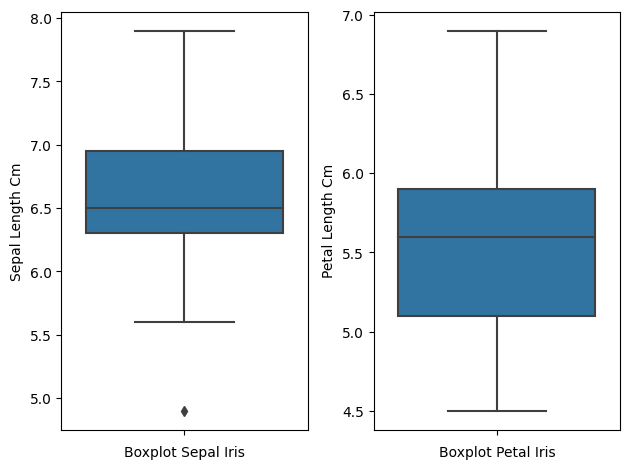

In [ ]:
iris_virginica = iris[iris["Species"] == "Iris-virginica"]
plt.subplot(1, 2, 1)
sns.boxplot(data=iris_virginica, y="SepalLengthCm")
plt.ylabel("Sepal Length Cm")
plt.xlabel("Boxplot Sepal Iris")
plt.subplot(1, 2, 2)
sns.boxplot(data=iris_virginica, y="PetalLengthCm")
plt.ylabel("Petal Length Cm")
plt.xlabel("Boxplot Petal Iris")
plt.tight_layout()
plt.show()